1% ~ 29 Mbp


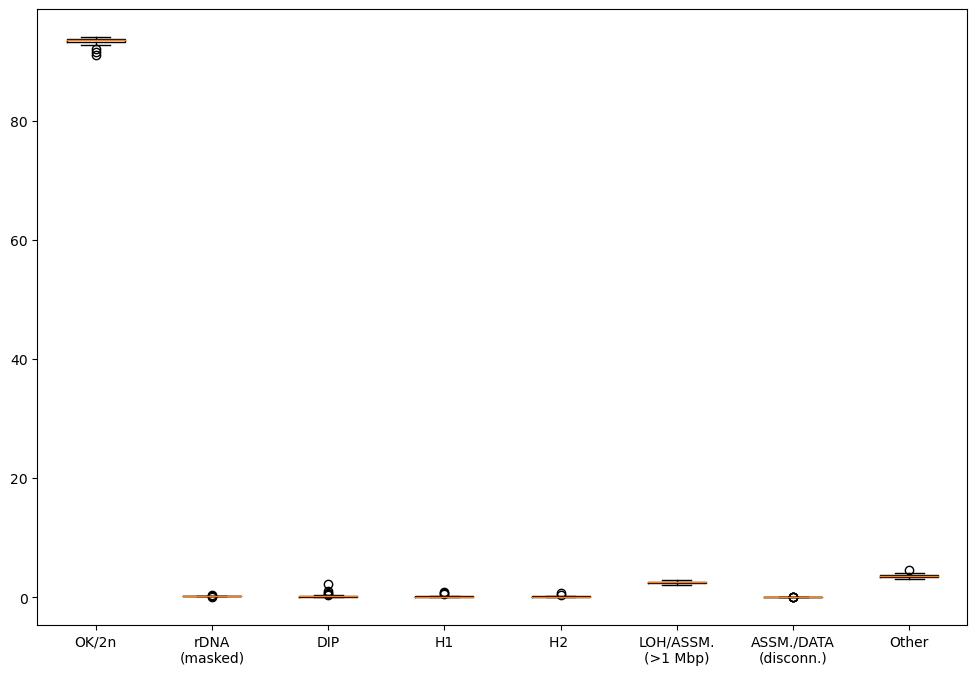

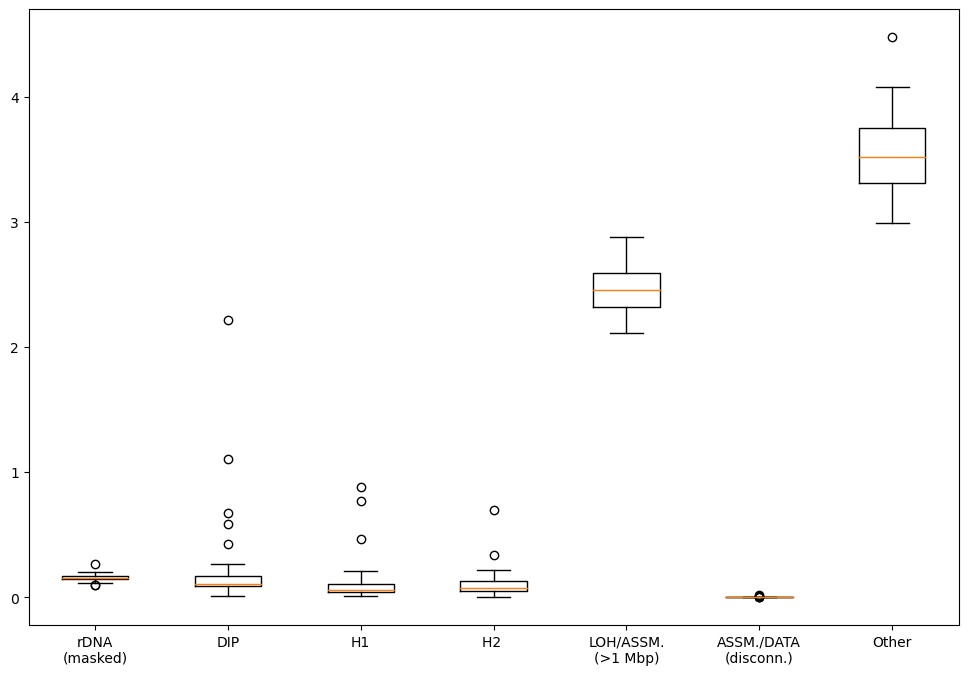

In [19]:
%run "../00_project_config.ipynb"

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

input_path = PROJECT_DATA_ROOT.joinpath(
    "2023_assm_stats/verkko/issues/contig_ref_stats"
)

merged_stats = []
for tsv_file in input_path.glob("*.tsv"):
    sample = tsv_file.name.split(".")[0]
    df = pd.read_csv(tsv_file, header=0, sep="\t", comment="#")
    df["sample"] = sample
    merged_stats.append(df)
    
stats = pd.concat(merged_stats, axis=0, ignore_index=False)
stats["pct_bp"] = (stats["num_bp"] / stats["num_bp"].max() * 100).round(3)

relative_unit = stats["num_bp"].max() / 100
relative_unit = f"1% ~ {round(relative_unit/1e6)} Mbp"
print(relative_unit)

stat_spec = [
    ("diploid_regions", "OK/2n"),
    ("rDNA_windows", "rDNA\n(masked)"),
    ("dip_phase_issue_windows", "DIP"),
    ("hap1_phase_issue_windows", "H1"),
    ("hap2_phase_issue_windows", "H2 "),
    ("loh_assm_issue_windows", "LOH/ASSM.\n(>1 Mbp)"),
    ("misassm_broken_windows", "ASSM./DATA\n(disconn.)"),
    ("other_windows", "Other")
]

xpos = []
xvals = []
xlabels = []

xloc = 0
for stat_name, stat_label in stat_spec:
    xloc += 1
    stat_values = stats.loc[stats["statistic"] == stat_name, "pct_bp"].values
    xpos.append(xloc)
    xvals.append(stat_values)
    xlabels.append(stat_label)
    
fig, ax = plt.subplots(figsize=(12, 8))

boxes_all = ax.boxplot(
    xvals,
    positions=xpos,
    labels=xlabels
)

fig, ax = plt.subplots(figsize=(12, 8))

boxes_sub = ax.boxplot(
    xvals[1:],
    positions=xpos[1:],
    labels=xlabels[1:]
)

    
    
